# Lesson 1.5.
# GridAPPS-D Messages

This tutorial introduces the format used for passing messages to the GridAPPS-D API and how to wrap those messages using the GridAPPSD-Python Library.

__Learning Objectives:__

At the end of the tutorial, the user should be able to

* 
* 
* 
* 

---
# Table of Contents

## 2.2. Structure of a JSON Query Message

Most simple queries are passed to PowerGrid Models API as JSON scripts wrapped in python string. The general format is 

```
message = """
{
    "requestType": "INSERT QUERY HERE",
    "resultFormat": "JSON",
    "modelId": "OPTIONAL INSERT MODEL mRID HERE",
    "objectId": "OPTIONAL INSERT OBJECT mRID HERE",
    "filter": "OPTIONAL INSERT SPARQL FILTER HERE"
}
```

The components of the message are as follows:

* `"requestType":` -- Specifies the type of query. Available requestType are listed in the next section.


* `"resultFormat":` -- Optional. Specifies the format of the response, can be `"JSON"`, `"CSV"`, or `"XML"`. JSON is used by default if no format is specified.


* `"modelID":` -- Optional. Used to filter the query to only one particular model whose mRID is specified. Be aware of spelling and capitalization differences between JSON query spelling `"modelId"` and Python Library spelling `model_id`.


* `"objectType":` -- Optional. Used to filter the query to only one CIM class of equipment. Speciying the _objectID_ will override any values specified for _objectType_. 


* `"objectID":` -- Optional. Used to filter the query to only one object whose mRID is specified. Specifying the _objectID_ will override any values specified for _objectType_. 


* `"filter":` -- Optional. Used to filter the query using a SPARQL filter. SPARQL queries are covered in the next lesson.


The usage of each of these message components are explained in detail with code block examples below. 

__Important__: Be sure to pay attention to placement of commas ( __,__ ) at the end of each JSON line. Commas are placed at the end of each line _except_ the last line. Incorrect comma placement will result in a JsonSyntaxException. 

All of the queries are passed to the PowerGrid Model API using the `.get_response(topic, message)` method for the GridAPPS-D platform connection variable.

# Using the STOMP Client

The GridAPPS-D Visualization App includes a feature to pass API call messages through the GUI using the Simple Text Oriented Messaging Protocol (STOMP).

Open the Viz App, which is hosted on [localhost:8080](http://localhost:8080/) (note: cloud-hosted installations will use the IP address of the server). 

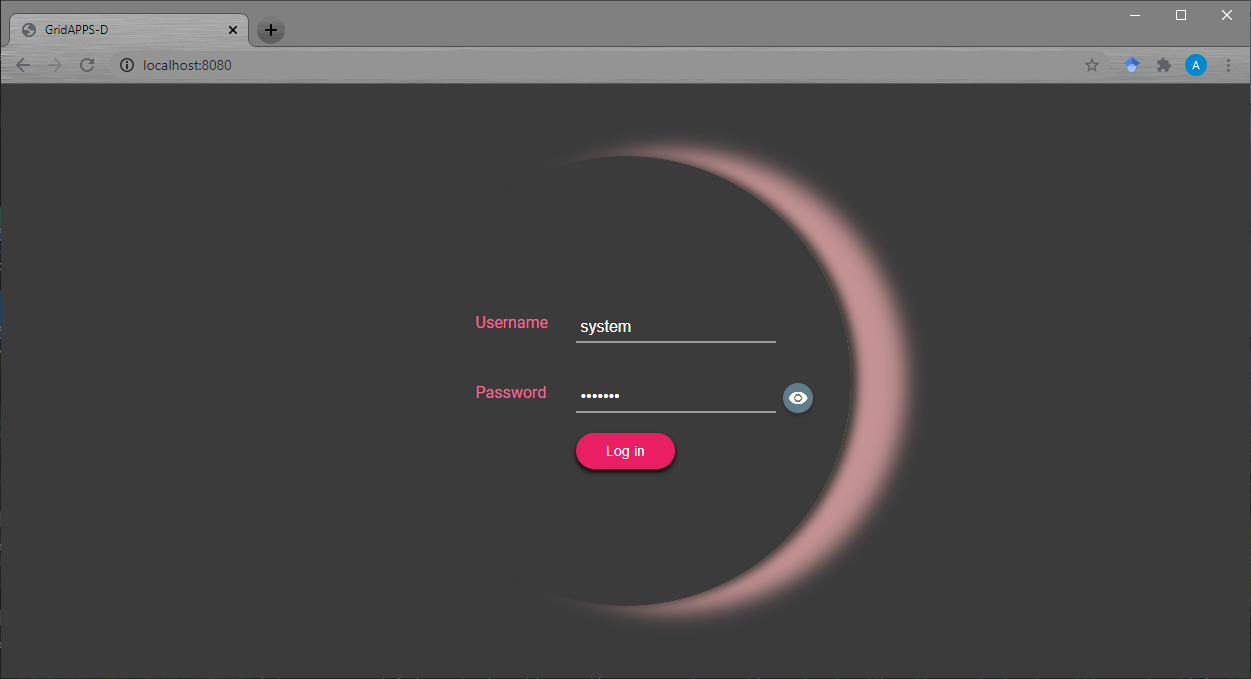

Log in and click on the menu in the top left corner of the browser window:

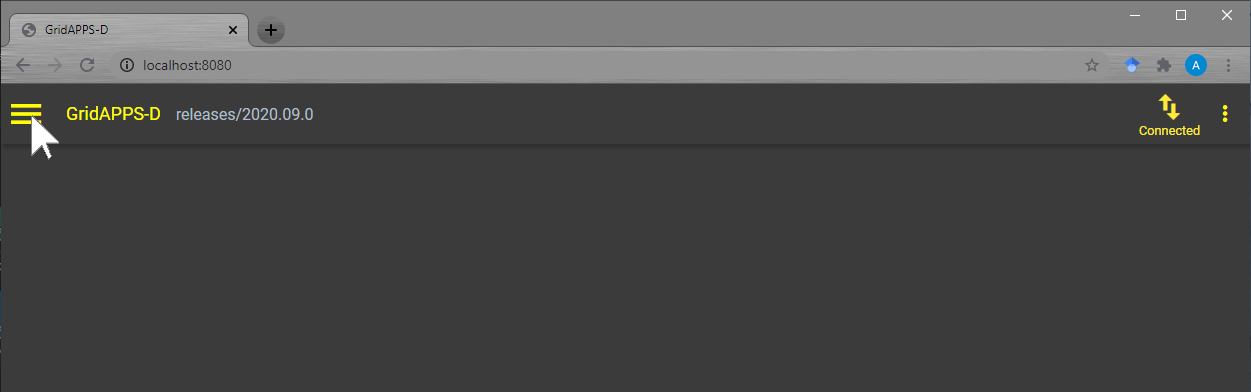


Select __Stomp Client__ from the drop-down menu:

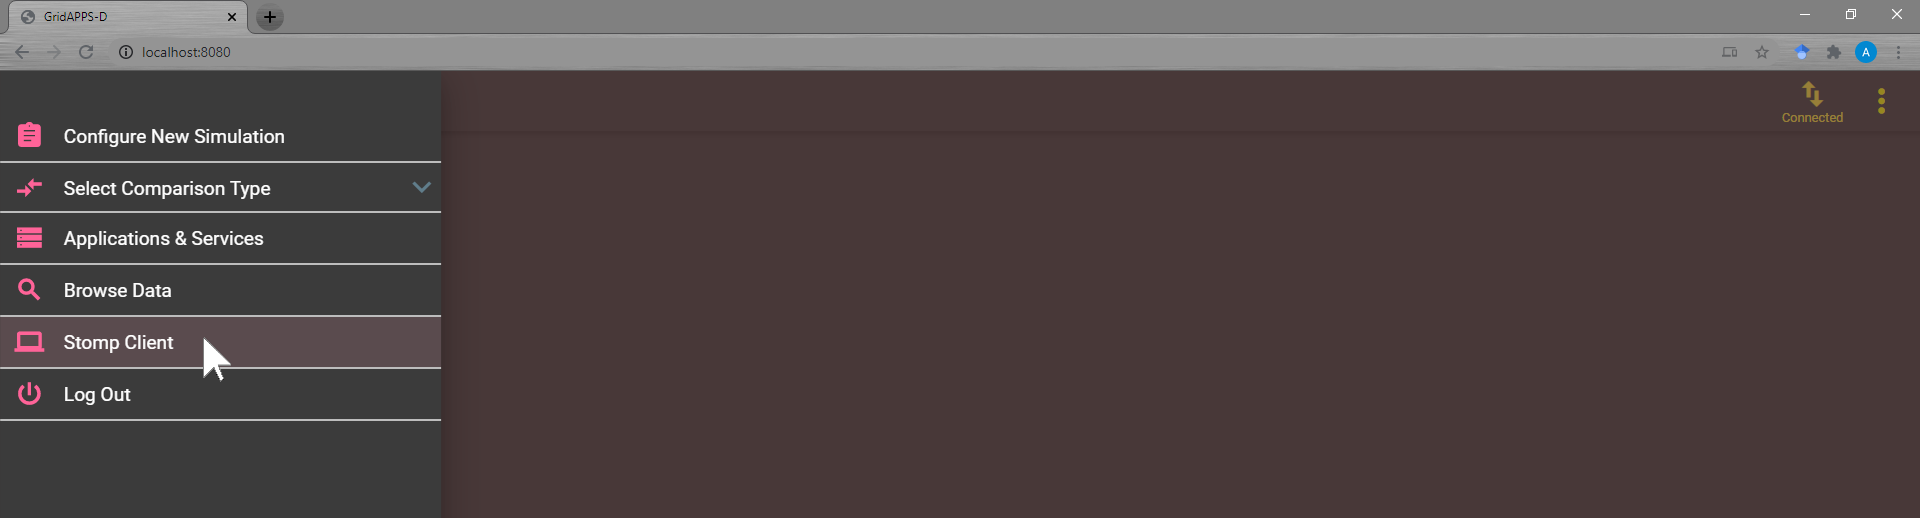

This opens the STOMP Client, which can be used to pass a message to any of the GridAPPS-D APIs to preview results or debug the API call message.

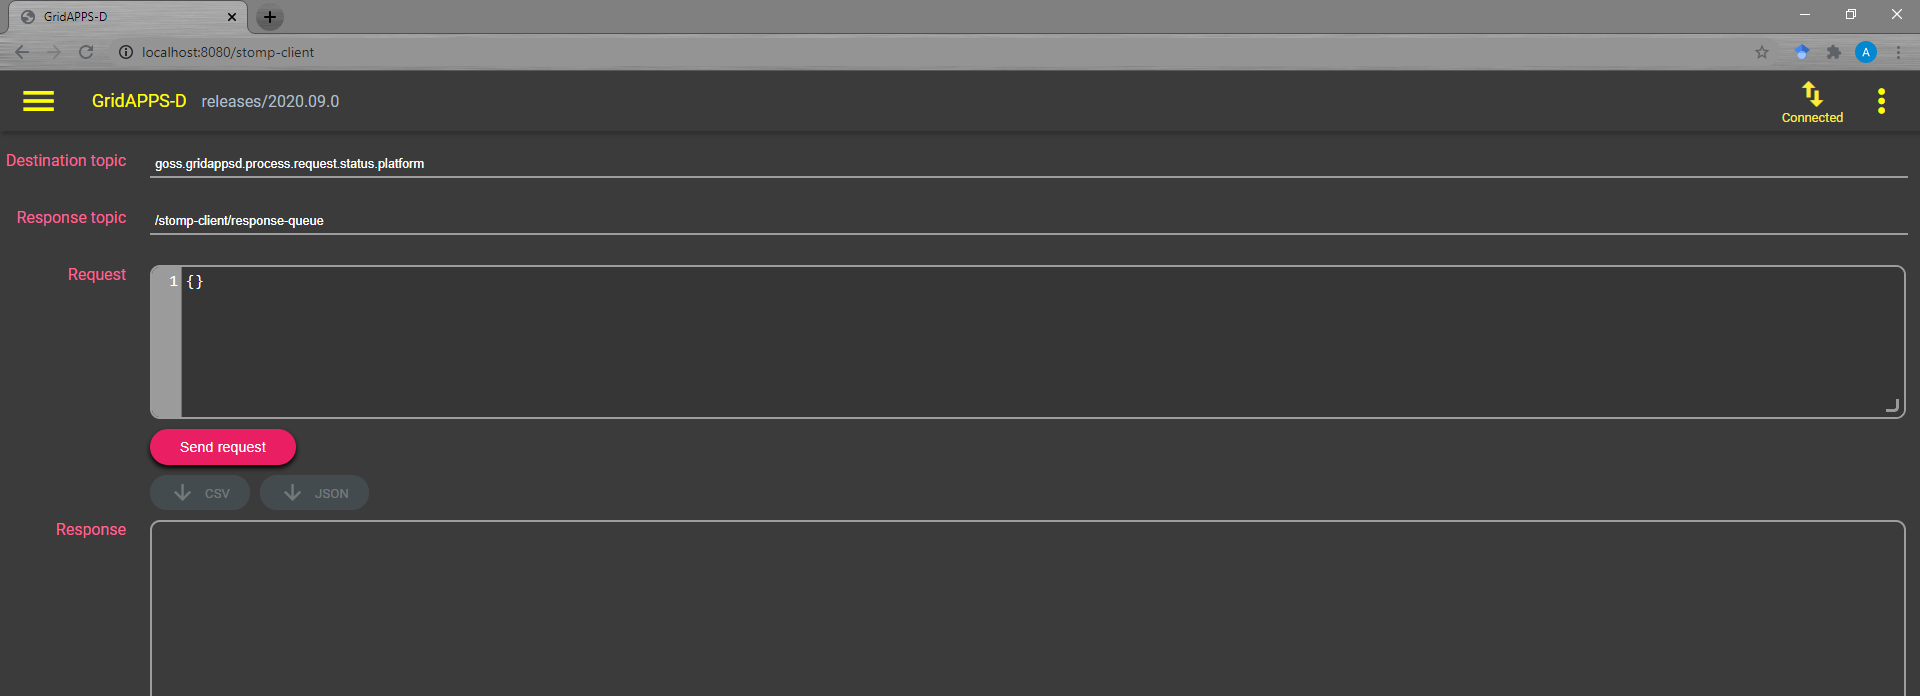

## XX.1. Specifying the Topic

The appropriate GridAPPS-D topic  needs to be copied and pasted into the __Destination Topic__ box at the top of the window. The topic specifies on which channel the STOMP Client will communicate with the GridAPPS-D Platform and to which API the message needs to be delivered. 

A complete list of GridAPPS-D topics was provided in [Lesson 1.4.](Lesson%201.4.%20GridAPPS-D%20Topics.ipynb) and will also be provided in context for each of the API calls detailed in subsequent lessons. 

__IMPORTANT:__ Remember to remove the python wrapping quotations at the beginning and end of the topic. For example, if the python-wrapped topic was

`topic = "goss.gridappsd.process.request.data.powergridmodel" # Specify the topic`

then the topic that is entered in the Stomp Client __Destination Topic__ box is simply

`goss.gridappsd.process.request.data.powergridmodel`

__IMPORTANT:__ The GridAPPSD-Python shortcut functions will not work in the STOMP Client. The full text string versions must be used. 



## XX.2. Entering the Request Message

The __Request__ box accepts an API call message identical to those provided in these notebook lessons.

__IMPORTANT:__ Remember to remove the python wrapping quotations at the beginning and end of the message. For example, if the python-wrapped message was

`message = "{"requestType": "QUERY_MODEL_NAMES", "resultFormat": "JSON"}" # Sample PowerGrid Model API Call`

then the message that is entered in the Stomp Client __Request__ box is simply

`{"requestType": "QUERY_MODEL_NAMES", "resultFormat": "JSON"}`

The STOMP client will automatically flag any errors in the JSON message.

## XX.3. Submitting a Request

After entering the topic and message, click __Send request__ to send the API call to the GridAPPS-D Platform. The response will be displayed in the box below.

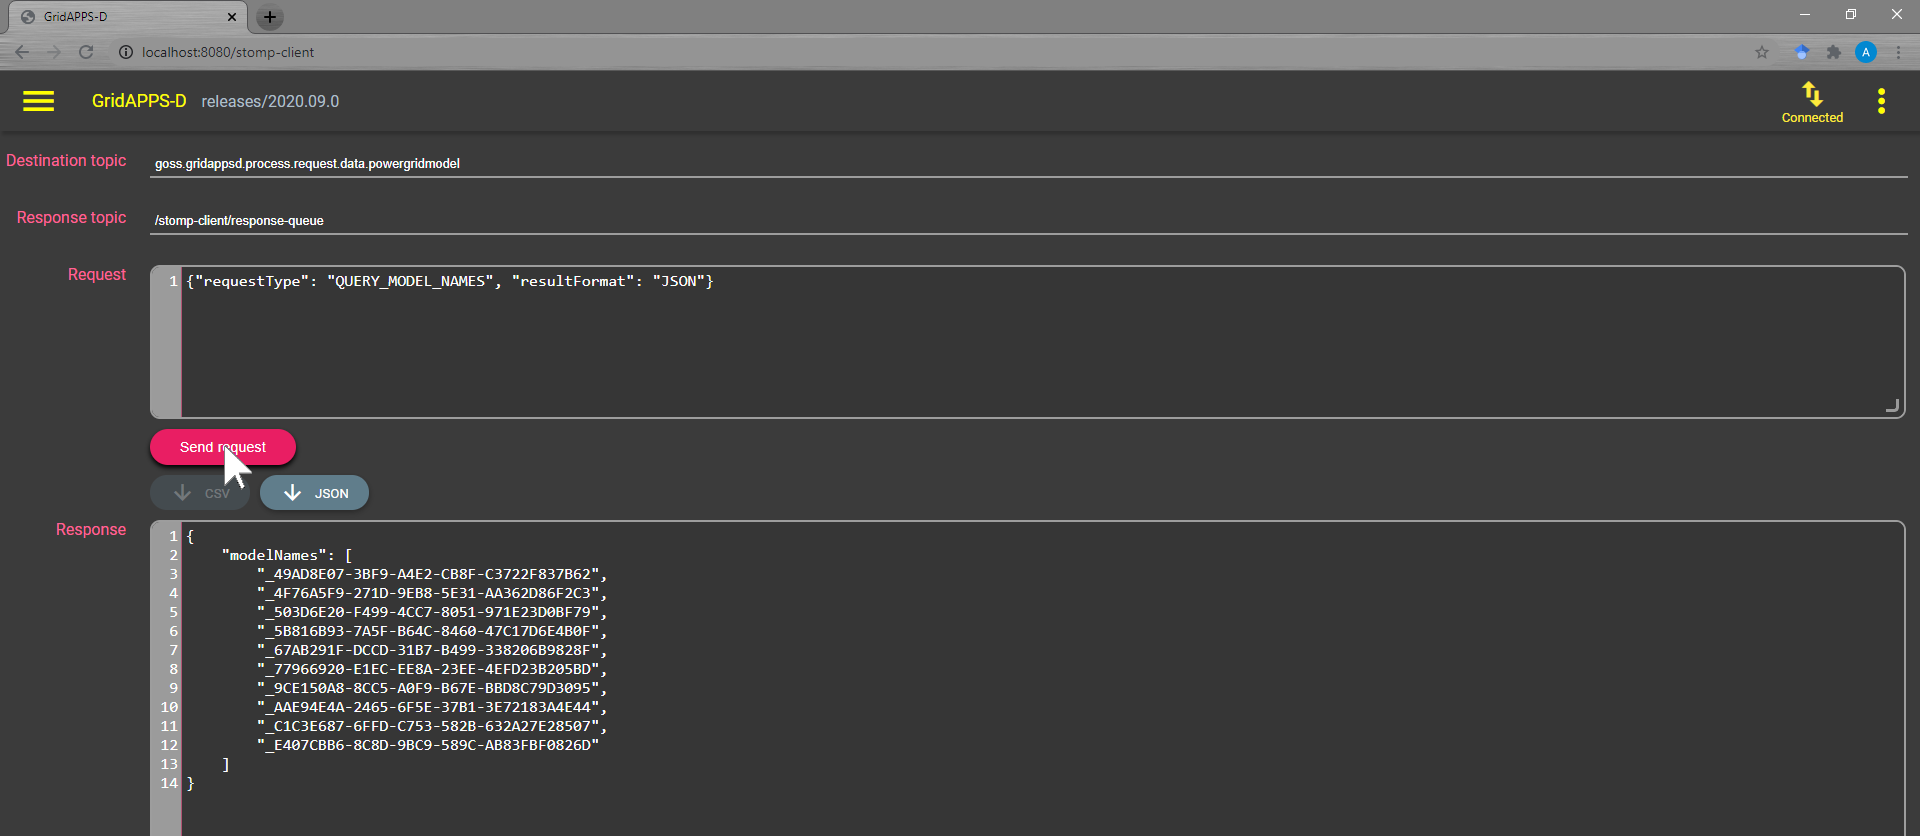

It can be seen that the response from the STOMP Client is identical to that obtained by passing the same topic and message using the GridAPPSD-Python Library:

In [1]:
from gridappsd import GridAPPSD # Import Libraries
gapps = GridAPPSD("('localhost', 61613)", username='system', password='manager') # Connect to Platform
topic = "goss.gridappsd.process.request.data.powergridmodel" # Specify correct Topic
message = '{"requestType": "QUERY_MODEL_NAMES", "resultFormat": "JSON"}' # Sample PowerGrid Model API message
gapps.get_response(topic, message) # Pass API call to Platform

{'data': {'modelNames': ['_49AD8E07-3BF9-A4E2-CB8F-C3722F837B62',
   '_4F76A5F9-271D-9EB8-5E31-AA362D86F2C3',
   '_503D6E20-F499-4CC7-8051-971E23D0BF79',
   '_5B816B93-7A5F-B64C-8460-47C17D6E4B0F',
   '_67AB291F-DCCD-31B7-B499-338206B9828F',
   '_77966920-E1EC-EE8A-23EE-4EFD23B205BD',
   '_9CE150A8-8CC5-A0F9-B67E-BBD8C79D3095',
   '_AAE94E4A-2465-6F5E-37B1-3E72183A4E44',
   '_C1C3E687-6FFD-C753-582B-632A27E28507',
   '_E407CBB6-8C8D-9BC9-589C-AB83FBF0826D']},
 'responseComplete': True,
 'id': '1896986225'}